In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import display_latex

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',index_col='Month')

In [3]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [4]:
milk.index = pd.to_datetime(milk.index)

In [5]:
split_date  = pd.Timestamp('1975-01-01')

In [6]:
train = milk[milk.index < split_date]
test  = milk[milk.index >= split_date]

In [7]:
train.shape, test.shape

((156, 1), (12, 1))

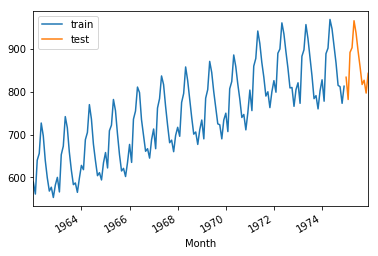

In [8]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

# Scaling Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
train_scaled = scaler.fit_transform(train)
test_scaled  = scaler.transform(test)

In [12]:
len(train_scaled)

156

In [13]:
X_train = []
y_train = []

for i in range(12,len(train_scaled)):
    X_train.append(train_scaled[i-12:i,0])
    y_train.append(train_scaled[i,0])


In [14]:
X_train,y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape

(144, 12)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [17]:
X_train.shape

(144, 12, 1)

In [18]:
from keras.models import Sequential
from keras.layers import  LSTM
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
rnn_reg = Sequential()

In [20]:
# first LSTM layer
rnn_reg.add(LSTM(units=50,return_sequences =True, input_shape = (X_train.shape[1],1)))
rnn_reg.add(Dropout(0.20))

# Second LSTM layer
rnn_reg.add(LSTM(units=50,return_sequences =True))
rnn_reg.add(Dropout(0.20))

# Third LSTM layer
rnn_reg.add(LSTM(units=50,return_sequences =True))
rnn_reg.add(Dropout(0.20))

# Fourth LSTM layer
rnn_reg.add(LSTM(units=50))
rnn_reg.add(Dropout(0.20))

#Output layer
# third LSTM layer
rnn_reg.add(Dense(units=1))


In [21]:
rnn_reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [22]:
rnn_reg.fit(X_train,y_train,epochs=1000,batch_size=12)

Epoch 1/1000
144/144 [==============================] - 3s - loss: 0.1495     
Epoch 2/1000
144/144 [==============================] - 0s - loss: 0.0549     
Epoch 3/1000
144/144 [==============================] - 0s - loss: 0.0361     
Epoch 4/1000
144/144 [==============================] - 0s - loss: 0.0322     
Epoch 5/1000
144/144 [==============================] - 0s - loss: 0.0250     
Epoch 6/1000
144/144 [==============================] - 0s - loss: 0.0286     
Epoch 7/1000
144/144 [==============================] - 0s - loss: 0.0256     
Epoch 8/1000
144/144 [==============================] - 0s - loss: 0.0248     
Epoch 9/1000
144/144 [==============================] - 0s - loss: 0.0210     
Epoch 10/1000
144/144 [==============================] - 0s - loss: 0.0252     
Epoch 11/1000
144/144 [==============================] - 0s - loss: 0.0233     
Epoch 12/1000
144/144 [==============================] - 0s - loss: 0.0237     
Epoch 13/1000
144/144 [==========================

144/144 [==============================] - 0s - loss: 0.0054     
Epoch 103/1000
144/144 [==============================] - 0s - loss: 0.0053     
Epoch 104/1000
144/144 [==============================] - 0s - loss: 0.0097     
Epoch 105/1000
144/144 [==============================] - 0s - loss: 0.0114     
Epoch 106/1000
144/144 [==============================] - 0s - loss: 0.0091     
Epoch 107/1000
144/144 [==============================] - 0s - loss: 0.0075     
Epoch 108/1000
144/144 [==============================] - 0s - loss: 0.0070     
Epoch 109/1000
144/144 [==============================] - 0s - loss: 0.0071     
Epoch 110/1000
144/144 [==============================] - 0s - loss: 0.0070     
Epoch 111/1000
144/144 [==============================] - 0s - loss: 0.0066     
Epoch 112/1000
144/144 [==============================] - 0s - loss: 0.0071     
Epoch 113/1000
144/144 [==============================] - 0s - loss: 0.0055     
Epoch 114/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0050     
Epoch 204/1000
144/144 [==============================] - 0s - loss: 0.0045     
Epoch 205/1000
144/144 [==============================] - 0s - loss: 0.0051     
Epoch 206/1000
144/144 [==============================] - 0s - loss: 0.0035     
Epoch 207/1000
144/144 [==============================] - 0s - loss: 0.0040     
Epoch 208/1000
144/144 [==============================] - 0s - loss: 0.0059     
Epoch 209/1000
144/144 [==============================] - 0s - loss: 0.0050     
Epoch 210/1000
144/144 [==============================] - 0s - loss: 0.0041     
Epoch 211/1000
144/144 [==============================] - 0s - loss: 0.0050     
Epoch 212/1000
144/144 [==============================] - 0s - loss: 0.0037     
Epoch 213/1000
144/144 [==============================] - 0s - loss: 0.0034     
Epoch 214/1000
144/144 [==============================] - 0s - loss: 0.0047     
Epoch 215/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0027     
Epoch 305/1000
144/144 [==============================] - 0s - loss: 0.0036     
Epoch 306/1000
144/144 [==============================] - 0s - loss: 0.0035     
Epoch 307/1000
144/144 [==============================] - 0s - loss: 0.0031     
Epoch 308/1000
144/144 [==============================] - 0s - loss: 0.0027     
Epoch 309/1000
144/144 [==============================] - 0s - loss: 0.0037     
Epoch 310/1000
144/144 [==============================] - 0s - loss: 0.0028     
Epoch 311/1000
144/144 [==============================] - 0s - loss: 0.0031     
Epoch 312/1000
144/144 [==============================] - 0s - loss: 0.0037     
Epoch 313/1000
144/144 [==============================] - 0s - loss: 0.0031     
Epoch 314/1000
144/144 [==============================] - 0s - loss: 0.0028     
Epoch 315/1000
144/144 [==============================] - 0s - loss: 0.0031     
Epoch 316/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0028     
Epoch 406/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 407/1000
144/144 [==============================] - 0s - loss: 0.0031     
Epoch 408/1000
144/144 [==============================] - 0s - loss: 0.0038     
Epoch 409/1000
144/144 [==============================] - 0s - loss: 0.0031     
Epoch 410/1000
144/144 [==============================] - 0s - loss: 0.0023     
Epoch 411/1000
144/144 [==============================] - 0s - loss: 0.0028     
Epoch 412/1000
144/144 [==============================] - 0s - loss: 0.0041     
Epoch 413/1000
144/144 [==============================] - 0s - loss: 0.0033     
Epoch 414/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 415/1000
144/144 [==============================] - 0s - loss: 0.0027     
Epoch 416/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 417/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0028     
Epoch 506/1000
144/144 [==============================] - 0s - loss: 0.0024     
Epoch 507/1000
144/144 [==============================] - 0s - loss: 0.0025     
Epoch 508/1000
144/144 [==============================] - 0s - loss: 0.0028     
Epoch 509/1000
144/144 [==============================] - 0s - loss: 0.0025     
Epoch 510/1000
144/144 [==============================] - 0s - loss: 0.0032     
Epoch 511/1000
144/144 [==============================] - 0s - loss: 0.0030     
Epoch 512/1000
144/144 [==============================] - 0s - loss: 0.0025     
Epoch 513/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 514/1000
144/144 [==============================] - 0s - loss: 0.0025     
Epoch 515/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 516/1000
144/144 [==============================] - 0s - loss: 0.0028     
Epoch 517/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0020     
Epoch 607/1000
144/144 [==============================] - 0s - loss: 0.0023     
Epoch 608/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 609/1000
144/144 [==============================] - 0s - loss: 0.0025     
Epoch 610/1000
144/144 [==============================] - 0s - loss: 0.0022     
Epoch 611/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 612/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 613/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 614/1000
144/144 [==============================] - 0s - loss: 0.0033     
Epoch 615/1000
144/144 [==============================] - 0s - loss: 0.0022     
Epoch 616/1000
144/144 [==============================] - 0s - loss: 0.0025     
Epoch 617/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 618/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0019     
Epoch 708/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 709/1000
144/144 [==============================] - 0s - loss: 0.0018     
Epoch 710/1000
144/144 [==============================] - 0s - loss: 0.0019     
Epoch 711/1000
144/144 [==============================] - 0s - loss: 0.0017     
Epoch 712/1000
144/144 [==============================] - 0s - loss: 0.0017     
Epoch 713/1000
144/144 [==============================] - 0s - loss: 0.0017     
Epoch 714/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 715/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 716/1000
144/144 [==============================] - 0s - loss: 0.0024     
Epoch 717/1000
144/144 [==============================] - 0s - loss: 0.0023     
Epoch 718/1000
144/144 [==============================] - 0s - loss: 0.0026     
Epoch 719/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0024     
Epoch 809/1000
144/144 [==============================] - 0s - loss: 0.0017     
Epoch 810/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 811/1000
144/144 [==============================] - 0s - loss: 0.0015     
Epoch 812/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 813/1000
144/144 [==============================] - 0s - loss: 0.0016     
Epoch 814/1000
144/144 [==============================] - 0s - loss: 0.0021     
Epoch 815/1000
144/144 [==============================] - 0s - loss: 0.0015     
Epoch 816/1000
144/144 [==============================] - 0s - loss: 0.0018     
Epoch 817/1000
144/144 [==============================] - 0s - loss: 0.0015     
Epoch 818/1000
144/144 [==============================] - 0s - loss: 0.0015     
Epoch 819/1000
144/144 [==============================] - 0s - loss: 0.0014     
Epoch 820/1000
144/144 [===================

144/144 [==============================] - 0s - loss: 0.0015     
Epoch 910/1000
144/144 [==============================] - 0s - loss: 0.0019     
Epoch 911/1000
144/144 [==============================] - 0s - loss: 0.0018     
Epoch 912/1000
144/144 [==============================] - 0s - loss: 0.0017     
Epoch 913/1000
144/144 [==============================] - 0s - loss: 0.0019     
Epoch 914/1000
144/144 [==============================] - 0s - loss: 0.0018     
Epoch 915/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 916/1000
144/144 [==============================] - 0s - loss: 0.0017     
Epoch 917/1000
144/144 [==============================] - 0s - loss: 0.0019     
Epoch 918/1000
144/144 [==============================] - 0s - loss: 0.0020     
Epoch 919/1000
144/144 [==============================] - 0s - loss: 0.0022     
Epoch 920/1000
144/144 [==============================] - 0s - loss: 0.0016     
Epoch 921/1000
144/144 [===================

In [23]:
test_scaled

array([[ 0.67548077],
       [ 0.55048077],
       [ 0.81490385],
       [ 0.84134615],
       [ 0.99278846],
       [ 0.92307692],
       [ 0.82451923],
       [ 0.73317308],
       [ 0.63461538],
       [ 0.65865385],
       [ 0.58653846],
       [ 0.69711538]])

In [24]:
X_train.shape

(144, 12, 1)

In [25]:
test_scaled.shape

(12, 1)

In [26]:
#X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [27]:
X_test = np.reshape(test_scaled,(test_scaled.shape[0],test_scaled.shape[1],1))

In [28]:
X_test.shape

(12, 1, 1)

In [29]:
milk.head(13)

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
1962-06-01 01:00:00,697.0
1962-07-01 01:00:00,640.0
1962-08-01 01:00:00,599.0
1962-09-01 01:00:00,568.0


In [30]:
inputs = milk[len(milk) - len(test) - 12:].values

In [31]:
inputs.shape

(24, 1)

In [32]:
inputs = inputs.reshape(-1,1)
inputs.shape

(24, 1)

In [33]:
inputs = scaler.transform(inputs)

In [34]:
inputs

array([[ 0.66105769],
       [ 0.54086538],
       [ 0.80769231],
       [ 0.83894231],
       [ 1.        ],
       [ 0.94711538],
       [ 0.85336538],
       [ 0.75480769],
       [ 0.62980769],
       [ 0.62259615],
       [ 0.52884615],
       [ 0.625     ],
       [ 0.67548077],
       [ 0.55048077],
       [ 0.81490385],
       [ 0.84134615],
       [ 0.99278846],
       [ 0.92307692],
       [ 0.82451923],
       [ 0.73317308],
       [ 0.63461538],
       [ 0.65865385],
       [ 0.58653846],
       [ 0.69711538]])

In [35]:
X_test = []
for i in range(12,len(inputs)):
    X_test.append(inputs[i-12:i,0])
X_test = np.array(X_test)

In [36]:
X_test.shape

(12, 12)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [38]:
X_test.shape

(12, 12, 1)

In [39]:
y_pred = rnn_reg.predict(X_test)

In [40]:
y_pred_real_scale = scaler.inverse_transform(y_pred)

In [41]:
y_pred_real_scale

array([[ 828.88232422],
       [ 798.5291748 ],
       [ 891.72021484],
       [ 886.73754883],
       [ 957.78613281],
       [ 939.9743042 ],
       [ 901.35961914],
       [ 860.59393311],
       [ 827.98675537],
       [ 811.3213501 ],
       [ 787.04101562],
       [ 810.47937012]], dtype=float32)

In [42]:
test

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


In [43]:
real_predicted = test.copy()
real_predicted.head()

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0


In [44]:
real_predicted['Predicted Milk Production'] = y_pred_real_scale

In [45]:
real_predicted

,Milk Production,Predicted Milk Production
Month,,
1975-01-01 01:00:00,834.0,828.882324
1975-02-01 01:00:00,782.0,798.529175
1975-03-01 01:00:00,892.0,891.720215
1975-04-01 01:00:00,903.0,886.737549
1975-05-01 01:00:00,966.0,957.786133
1975-06-01 01:00:00,937.0,939.974304
1975-07-01 01:00:00,896.0,901.359619
1975-08-01 01:00:00,858.0,860.593933
1975-09-01 01:00:00,817.0,827.986755


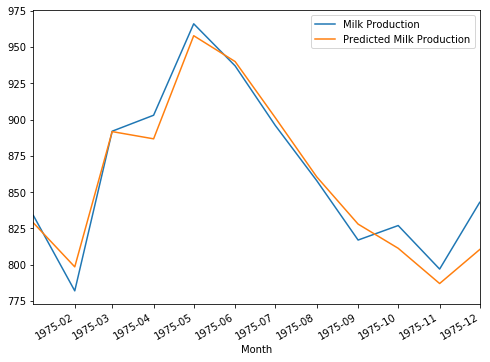

In [46]:
real_predicted.plot(figsize=(8,6))